In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
house_pricing_data_bristol = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/house_pricing_bristol.csv")
house_pricing_data_cornwall = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/house_pricing_cornwall.csv")

In [42]:
bristol_crime_data = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/bristol-crime-cleaned.csv")
cornwall_crime_data = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Cleaning/cleaned-data/cornwall-crime-cleaned.csv")

In [43]:
population_2011 = pd.read_csv("/Users/anukul/Desktop/Anukul/Learning/DataScience/Obtaining/population-2011.csv")


In [44]:
house_pricing_data_bristol['Year'] = pd.to_datetime(house_pricing_data_bristol['Year']).dt.year
house_pricing_data_cornwall['Year'] = pd.to_datetime(house_pricing_data_cornwall['Year']).dt.year

In [45]:
bristol_house_price_2022 = house_pricing_data_bristol[house_pricing_data_bristol['Year'] == 2022]
cornwall_house_price_2022 = house_pricing_data_cornwall[house_pricing_data_cornwall['Year'] == 2022]

In [46]:
growth_factor = 1.00561255390388033
population_2011['Population'] = population_2011['Population'].str.replace(',', '').astype(float)
population_2023 = population_2011.copy()
population_2023['Population_2023'] = population_2011['Population'] * growth_factor

In [47]:
years_span = 2023 - 2011
annual_growth_rate = growth_factor ** (1 / years_span)
population_2022 = population_2023.copy()
population_2022['Population_2022'] = population_2023['Population_2023'] / annual_growth_rate

In [36]:
bristol_crime_data['Year'].head()

0    2021-07
1    2021-07
2    2021-07
3    2021-07
4    2021-07
Name: Year, dtype: object

In [49]:
bristol_crime_data['Postcode'] = bristol_crime_data['postcode'].str.extract(r'^(\S+ \d)')
bristol_crime_data['Year'] = pd.to_datetime(bristol_crime_data['Year'], format='%Y-%m', errors='coerce')

In [50]:
cornwall_crime_data['Postcode'] = cornwall_crime_data['postcode'].str.extract(r'^(\S+ \d)')
cornwall_crime_data['Year'] = pd.to_datetime(cornwall_crime_data['Year'].astype(str) ,format='%Y-%m', errors='coerce')

In [51]:
bs_drug_offense_rate_2022 = (bristol_crime_data[bristol_crime_data['Year'].dt.year == 2022]
                             .merge(population_2022, left_on='Postcode', right_on='Postcode', how='left')
                             .query('Crime_type == "Drugs" and city == "Bristol, City of" and Population.notna()')
                             .groupby('Postcode')
                             .agg(drug_offenses=('Crime_type', 'size'),
                                  population=('Population', 'first'))
                             .reset_index()
                             .assign(drug_offense_rate=lambda x: x['drug_offenses'] / x['population'] * 10000))

In [23]:
bs_drug_offense_rate_2022

,Postcode,drug_offenses,population,drug_offense_rate
0,BS10 5,37,9500.0,38.947368
1,BS10 6,8,10223.0,7.825492
2,BS10 7,14,7882.0,17.761989
3,BS11 0,16,9574.0,16.711928
4,BS11 9,3,7780.0,3.856041
5,BS13 0,28,7542.0,37.125431
6,BS13 7,17,8316.0,20.442520
7,BS13 8,25,7339.0,34.064586
8,BS14 0,21,8866.0,23.685991
9,BS14 8,4,7765.0,5.151320


In [52]:
cw_drug_offense_rate_2022 = (cornwall_crime_data[cornwall_crime_data['Year'].dt.year == 2022]
                             .merge(population_2022, left_on='Postcode', right_on='Postcode', how='left')
                             .query('Crime_type == "Drugs" and city == "Cornwall" and Population.notna()')
                             .groupby('Postcode')
                             .agg(drug_offenses=('Crime_type', 'size'),
                                  population=('Population', 'first'))
                             .reset_index()
                             .assign(drug_offense_rate=lambda x: x['drug_offenses'] / x['population'] * 10000))

In [66]:
cw_drug_offense_rate_2022

,Postcode,drug_offenses,population,drug_offense_rate
0,EX22 6,1,5939.0,1.683785
1,EX22 7,2,4806.0,4.161465
2,EX23 0,19,3460.0,54.913295
3,EX23 8,6,7401.0,8.107013
4,PL10 1,2,3656.0,5.470460
...,...,...,...,...
63,TR19 7,3,5733.0,5.232862
64,TR20 8,5,4709.0,10.617966
65,TR26 1,13,3741.0,34.750067
66,TR26 2,2,6225.0,3.212851


In [ ]:
bristol_house_price_2022['Postcode'] = bristol_house_price_2022['Postcode'].str.extract(r'^(\S+ \d{1,2})')

In [59]:
bs_house_price_drug_rate_2022 = (bristol_house_price_2022
                                 .merge(bs_drug_offense_rate_2022, left_on='Postcode', right_on='Postcode')
                                 .loc[:, ['Housing_Price', 'drug_offense_rate']])


In [60]:
bs_house_price_drug_rate_2022

,Housing_Price,drug_offense_rate
0,825000,20.442520
1,379950,23.685991
2,415000,17.761989
3,660000,3.856041
4,365000,23.685991
...,...,...
2083,155883,23.685991
2084,315000,16.528926
2085,240000,23.685991
2086,180000,13.131018


In [61]:
cor_coeff_bs = bs_house_price_drug_rate_2022.corr().loc['Housing_Price', 'drug_offense_rate']
print(f"Correlation Coefficient (Bristol): {cor_coeff_bs}")

Correlation Coefficient (Bristol): 0.011170957739572057


In [62]:
X_bs = bs_house_price_drug_rate_2022[['drug_offense_rate']]
y_bs = bs_house_price_drug_rate_2022['Housing_Price']
model_bs = LinearRegression().fit(X_bs, y_bs)
predictions_bs = model_bs.predict(X_bs)
r2_bs = r2_score(y_bs, predictions_bs)
print(f"R-squared (Bristol): {r2_bs}")

R-squared (Bristol): 0.00012479029681955467


In [73]:
import statsmodels.api as sm

In [75]:
X_cw = bs_house_price_drug_rate_2022[['drug_offense_rate']]
y_cw = bs_house_price_drug_rate_2022['Housing_Price']

X_cw_with_const = sm.add_constant(X_cw)

model_cw_sm = sm.OLS(y_cw, X_cw_with_const).fit()

print(model_cw_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Housing_Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2603
Date:                Mon, 19 Aug 2024   Prob (F-statistic):              0.610
Time:                        20:12:38   Log-Likelihood:                -31605.
No. Observations:                2088   AIC:                         6.321e+04
Df Residuals:                    2086   BIC:                         6.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.144e+05   4.01e+0

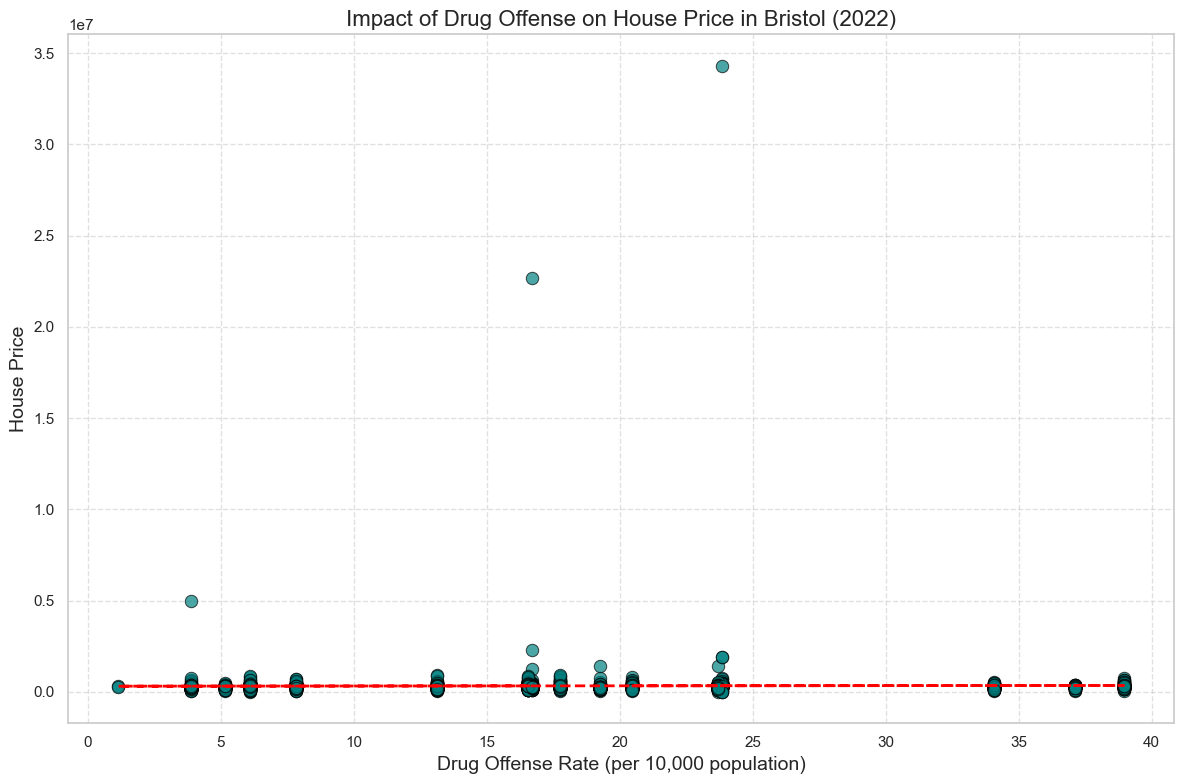

In [72]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.scatterplot(x='drug_offense_rate', y='Housing_Price', data=bs_house_price_drug_rate_2022, color='teal', s=80, edgecolor='black', alpha=0.7)
plt.plot(X_bs, model_bs.predict(X_bs), color='red', linewidth=2, linestyle='--')
plt.title('Impact of Drug Offense on House Price in Bristol (2022)', fontsize=16)
plt.xlabel('Drug Offense Rate (per 10,000 population)', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [64]:
cornwall_house_price_2022['Postcode'] = cornwall_house_price_2022['Postcode'].str.extract(r'^(\S+ \d{1,2})')

/var/folders/jx/pym939rn0_zgvv112pfcjs8r0000gn/T/ipykernel_23293/2954614120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cornwall_house_price_2022['Postcode'] = cornwall_house_price_2022['Postcode'].str.extract(r'^(\S+ \d{1,2})')


In [67]:
cw_house_price_drug_rate_2022 = (cornwall_house_price_2022
                                 .merge(cw_drug_offense_rate_2022, left_on='Postcode', right_on='Postcode')
                                 .loc[:, ['Housing_Price', 'drug_offense_rate']])

In [68]:
cor_coeff_cw = cw_house_price_drug_rate_2022.corr().loc['Housing_Price', 'drug_offense_rate']
print(f"Correlation Coefficient (Cornwall): {cor_coeff_cw}")

Correlation Coefficient (Cornwall): -0.036438744128912154


In [76]:
X_cw = cw_house_price_drug_rate_2022[['drug_offense_rate']]
y_cw = cw_house_price_drug_rate_2022['Housing_Price']

X_cw_with_const = sm.add_constant(X_cw)

model_cw_sm = sm.OLS(y_cw, X_cw_with_const).fit()

print(model_cw_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          Housing_Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.62
Date:                Mon, 19 Aug 2024   Prob (F-statistic):            0.00113
Time:                        20:15:04   Log-Likelihood:            -1.1533e+05
No. Observations:                7987   AIC:                         2.307e+05
Df Residuals:                    7985   BIC:                         2.307e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.741e+05   6208.24

In [69]:
X_cw = cw_house_price_drug_rate_2022[['drug_offense_rate']]
y_cw = cw_house_price_drug_rate_2022['Housing_Price']
model_cw = LinearRegression().fit(X_cw, y_cw)
predictions_cw = model_cw.predict(X_cw)
r2_cw = r2_score(y_cw, predictions_cw)
print(f"R-squared (Cornwall): {r2_cw}")

R-squared (Cornwall): 0.0013277820736925516


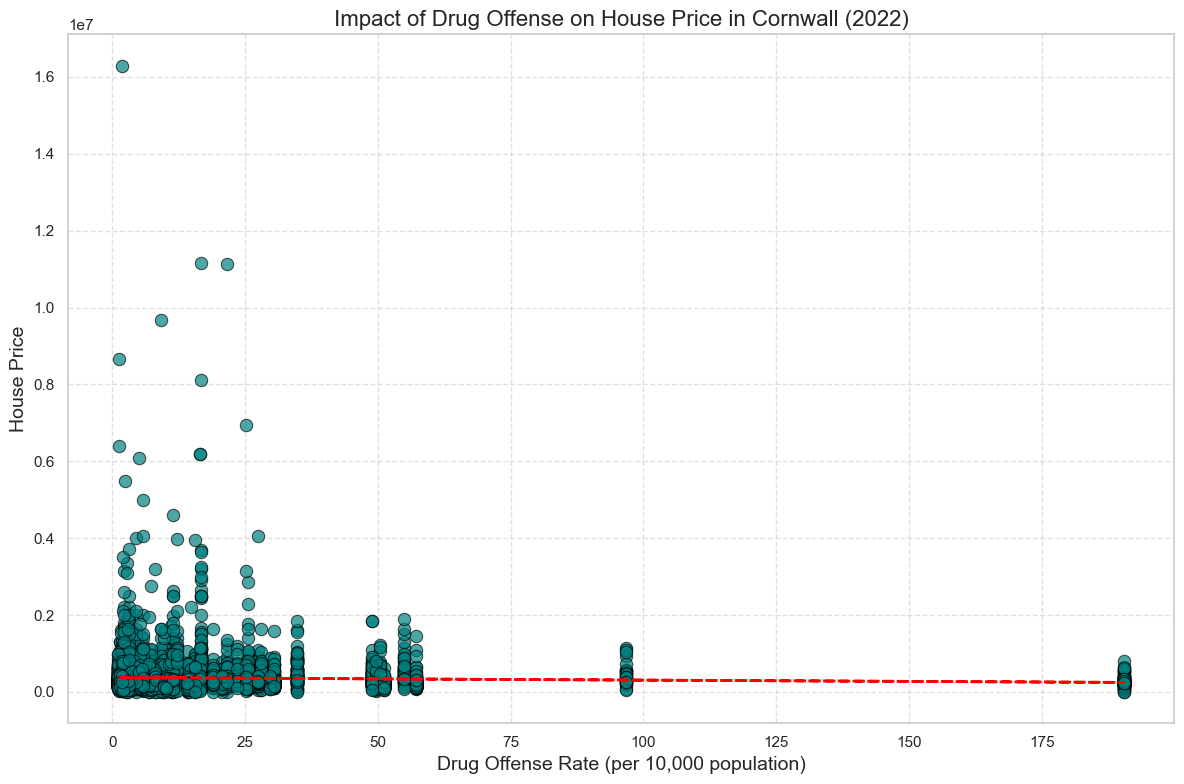

In [71]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.scatterplot(x='drug_offense_rate', y='Housing_Price', data=cw_house_price_drug_rate_2022, color='teal', s=80, edgecolor='black', alpha=0.7)
plt.plot(X_cw, model_cw.predict(X_cw), color='red', linewidth=2, linestyle='--')
plt.title('Impact of Drug Offense on House Price in Cornwall (2022)', fontsize=16)
plt.xlabel('Drug Offense Rate (per 10,000 population)', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()